# 02.09 Modules: Portfolio

> https://docs.openbb.co/sdk/guides/intros/portfolio

In [1]:
from openbb_terminal.sdk import openbb
import pandas as pd
# %matplotlib inline (uncomment if using a Jupyter Notebook or an Interactive Window)

In [2]:
help(openbb.portfolio)

Help on Breadcrumb in module openbb_terminal.core.library.breadcrumb:

<openbb_terminal.core.library.breadcrumb.Breadcrumb object>
    PORTFOLIO Menu
    
    The SDK commands of the the menu:
            <openbb>.portfolio.bench
            <openbb>.portfolio.summary
            <openbb>.portfolio.rbeta
            <openbb>.portfolio.rbeta_chart
            <openbb>.portfolio.rvol
            <openbb>.portfolio.rvol_chart
            <openbb>.portfolio.holdv
            <openbb>.portfolio.holdv_chart
            <openbb>.portfolio.om
            <openbb>.portfolio.om_chart
            <openbb>.portfolio.holdp
            <openbb>.portfolio.holdp_chart
            <openbb>.portfolio.maxdd
            <openbb>.portfolio.maxdd_chart
            <openbb>.portfolio.var
            <openbb>.portfolio.rsort
            <openbb>.portfolio.rsort_chart
            <openbb>.portfolio.mret
            <openbb>.portfolio.mret_chart
            <openbb>.portfolio.show
            <openbb>.portfolio

## Set up portfolio

### Portfolio Files

Examples can be found here: [GitHub > OpenBBTerminal > portfolio_examples](https://github.com/OpenBB-finance/OpenBBTerminal/tree/main/openbb_terminal/miscellaneous/portfolio_examples/holdings)

In [3]:
!wget --directory-prefix=/home/gitpod/OpenBBUserData/portfolio/holdings/ https://raw.githubusercontent.com/OpenBB-finance/OpenBBTerminal/main/openbb_terminal/miscellaneous/portfolio_examples/holdings/example.csv


--2023-01-18 03:43:28--  https://raw.githubusercontent.com/OpenBB-finance/OpenBBTerminal/main/openbb_terminal/miscellaneous/portfolio_examples/holdings/example.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 459 [text/plain]
Saving to: ‘/home/gitpod/OpenBBUserData/portfolio/holdings/example.csv’

example.csv         100%[===================>]     459  --.-KB/s    in 0s      

2023-01-18 03:43:28 (35.8 MB/s) - ‘/home/gitpod/OpenBBUserData/portfolio/holdings/example.csv’ saved [459/459]



In [4]:
!ls -a /home/gitpod/OpenBBUserData/portfolio/holdings

.  ..  example.csv


### Load

In [5]:
help(openbb.portfolio.load)

Help on Operation in module openbb_terminal.core.library.operation:

<openbb_terminal.core.library.operation.Operation object>
    Get PortfolioEngine object
    
    Parameters
    ----------
    transactions_file_path : str
        Path to transactions file
    benchmark_symbol : str
        Benchmark ticker to download data
    full_shares : bool
        Whether to mimic the portfolio trades exactly (partial shares) or round down the
        quantity to the nearest number
    risk_free_rate : float
        Risk free rate in float format
    
    Returns
    -------
    PortfolioEngine
        PortfolioEngine class instance, this will hold transactions and perform calculations
    
    Examples
    --------
    >>> from openbb_terminal.sdk import openbb
    >>> p = openbb.portfolio.load("openbb_terminal/miscellaneous/portfolio_examples/holdings/example.csv")



In [7]:
P = openbb.portfolio.load(
  transactions_file_path = '/home/gitpod/OpenBBUserData/portfolio/holdings/example.csv',
  benchmark_symbol = 'VTI',
  full_shares = False,
  risk_free_rate = 3.0
)

Preprocessing transactions:  93%|█████████▎| 13/14 [00:00<00:00, 16.65it/s] 

F:AAPL

F:MSFT

         Loading benchmark: 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]


### The Portfolio Object

In [9]:
P.set_benchmark(symbol = 'SPY')

         Loading benchmark: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]


In [10]:
P.benchmark_ticker

'SPY'

In [12]:
# Populating a list of tickers from the Portfolio Object is accomplished by assigning a variable to it
tickers = P.tickers_list
tickers

['BTC-USD', 'AAPL', 'MSFT']

## Portfolio analysis

### Show

Display portfolio transcations

In [13]:
openbb.portfolio.show(P)

,Date,Type,Ticker,Side,Price,Quantity,Fees,Investment,Currency,Sector,Industry,Country,Region
3,2021-07-02,STOCK,AAPL,Buy,139.8,300,0,41940.0,USD,,,,
2,2021-05-21,CRYPTO,BTC-USD,Buy,37430.0,1,0,37430.0,USD,Crypto,Crypto,Crypto,Crypto
1,2021-03-26,STOCK,MSFT,Buy,232.8,200,0,46560.0,USD,,,,
0,2021-03-24,STOCK,AAPL,Buy,120.7,300,0,36210.0,USD,,,,


### Performance

Analyse performance against the benchmark

In [14]:
openbb.portfolio.perf(P)

,Portfolio,Benchmark,Difference
Total Investment,162140.0,162140.0,-
Total Value,150937.985107,162334.232576,-11396.247469
Total % Return,-6.91%,0.12%,-7.03%
Total Abs Return,-11202.014893,194.232576,-11396.247469


### Summary

Analyse risk metrics, comparing the portfolio against the benchmark

In [15]:
openbb.portfolio.summary(P)

,Portfolio,Benchmark,Difference
Volatility,1.60%,1.03%,0.57%
Skew,-0.047042,-0.110327,0.063285
Kurtosis,2.7183,3.329762,-0.611462
Maximum Drawdown,-39.70%,-24.50%,-15.21%
Sharpe ratio,0.003472,0.012006,-0.008534
Sortino ratio,0.004656,0.014476,-0.00982
R2 Score,66.61%,66.61%,0.00%


### Maximum drawdown: MaxDD

In [27]:
# initiate dataframes
holdings,dd = openbb.portfolio.maxdd(P)

# Drawdown as Pandas dataframe
dd = pd.DataFrame(dd)
dd.rename(columns = {'Total': 'Portfolio % Drawdown'}, inplace = True)

# Portfolio as Pandas dataframe
holdings = pd.DataFrame(holdings)
holdings.rename(columns = {'Total': 'Portfolio Value'}, inplace = True)

In [28]:
# show drawdown dataframe
dd

,Portfolio % Drawdown
Date,
2021-03-24,0.000000
2021-03-25,0.000000
2021-03-26,0.000000
2021-03-27,0.000000
2021-03-28,0.000000
...,...
2023-01-14,-0.337907
2023-01-15,-0.338329
2023-01-16,-0.337052


In [29]:
# show holdings dataframe
holdings

,Portfolio Value
Date,
2021-03-24,35652.843475
2021-03-25,35801.284790
2021-03-26,82559.815979
2021-03-27,82559.815979
2021-03-28,82559.815979
...,...
2023-01-14,149678.294678
2023-01-15,149582.794678
2023-01-16,149871.628662


In [30]:
# merge drawdown and holdings dataframes
df_merged = dd.join(holdings)
df_merged.index = df_merged.index.strftime(date_format='%Y-%m-%d')
df_merged.tail(10)

,Portfolio % Drawdown,Portfolio Value
Date,,
2023-01-09,-0.377575,140710.550049
2023-01-10,-0.373400,141654.291626
2023-01-11,-0.357792,145182.900635
2023-01-12,-0.351446,146617.588989
2023-01-13,-0.342625,148611.570068
2023-01-14,-0.337907,149678.294678
2023-01-15,-0.338329,149582.794678
2023-01-16,-0.337052,149871.628662
2023-01-17,-0.332965,150795.522217


#### Drawdown chart

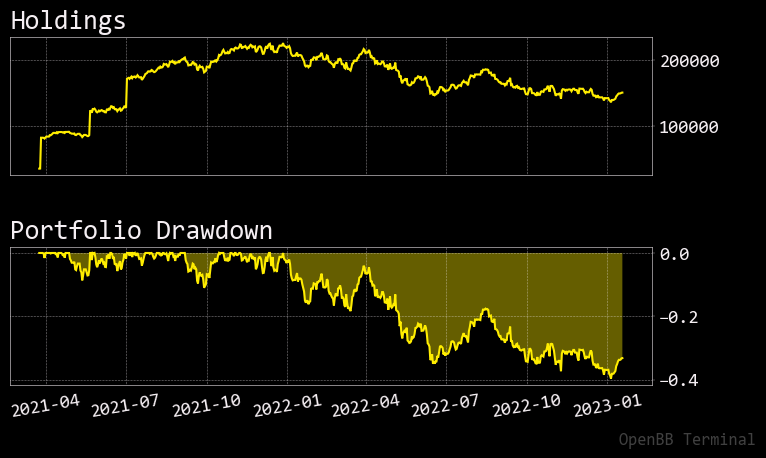

In [32]:
openbb.portfolio.maxdd_chart(P)

### Rolling sharpe ratio: RSharpe

In [33]:
rs = openbb.portfolio.rsharpe(P, window = '3m')
rs.rename(columns = {'portfolio': 'Portfolio Sharpe', 'benchmark': 'Benchmark Sharpe'}, inplace = True)
rs.index = rs.index.strftime(date_format='%Y-%m-%d')

rs.tail(5)

,Portfolio Sharpe,Benchmark Sharpe
Date,,
2023-01-14,-0.038601,0.012324
2023-01-15,-0.036124,0.012324
2023-01-16,-0.021850,0.026954
2023-01-17,-0.025247,0.009298
2023-01-18,-0.017840,0.022551


### Rolling volatility: RVol

In [38]:
rv = openbb.portfolio.rvol(P, window = '3m')
rv.rename(columns={'portfolio': 'Portfolio Volatility', 'benchmark': 'Benchmark Volatility'}, inplace = True)
rv.index = rv.index.strftime(date_format='%Y-%m-%d')

rv.tail(5)

,Portfolio Volatility,Benchmark Volatility
Date,,
2023-01-14,0.014191,0.009350
2023-01-15,0.014188,0.009350
2023-01-16,0.014128,0.009284
2023-01-17,0.014101,0.009227
2023-01-18,0.014086,0.009174


### Daily returns: DRet

Calculate daily returns for the portfolio and benchmark

In [39]:
returns = openbb.portfolio.dret(P)
returns.rename(columns = {'portfolio': 'Portfolio % Returns', 'benchmark': 'Benchmark % Returns'}, inplace = True)
returns.index = returns.index.rename('Date')

returns.tail(5)

,Portfolio % Returns,Benchmark % Returns
Date,,
2023-01-14,0.007178,0.000000
2023-01-15,-0.000638,0.000000
2023-01-16,0.001931,0.000000
2023-01-17,0.006165,-0.001832
2023-01-18,0.000945,0.000000


### Yearly returns: yret

In [40]:
openbb.portfolio.yret(P)

,Portfolio,Benchmark,Difference
2021,39.304863,23.474199,15.830665
2022,-34.882593,-18.175363,-16.707229
2023,5.844079,4.011191,1.832888


## Portfolio Optimization

https://docs.openbb.co/sdk/guides/intros/portfolio/po

### Set up portfolio


#### Portfolio Files

Relevant files can be found here: https://github.com/OpenBB-finance/OpenBBTerminal/tree/main/openbb_terminal/miscellaneous/portfolio_examples/allocation

In [49]:
!wget --directory-prefix=/home/gitpod/OpenBBUserData/portfolio/allocation/ "https://github.com/OpenBB-finance/OpenBBTerminal/blob/main/openbb_terminal/miscellaneous/portfolio_examples/allocation/SP_500_Portfolio.xlsx"

--2023-01-18 04:21:27--  https://github.com/OpenBB-finance/OpenBBTerminal/blob/main/openbb_terminal/miscellaneous/portfolio_examples/allocation/SP_500_Portfolio.xlsx
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/home/gitpod/OpenBBUserData/portfolio/allocation/SP_500_Portfolio.xlsx’

SP_500_Portfolio.xl     [ <=>                ] 148.61K  --.-KB/s    in 0.02s   

2023-01-18 04:21:27 (6.11 MB/s) - ‘/home/gitpod/OpenBBUserData/portfolio/allocation/SP_500_Portfolio.xlsx’ saved [152176]



In [50]:
!ls -a /home/gitpod/OpenBBUserData/portfolio/allocation/

.  ..  60_40_Portfolio.xlsx  SP_500_Portfolio.xlsx


### Risk Parity 

### Hierarchical Risk Parity